In [2]:
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d.axes3d import get_test_data

import athena_read

In [3]:
q = 'vel3'

In [4]:
h = 1

def theta_func(xmin, xmax, _, nf):
    x2_vals = np.linspace(xmin, xmax, nf)
    theta_vals = x2_vals + (1.0 - h) / 2.0 * np.sin(2.0 * x2_vals)
    return theta_vals

In [11]:
idf = 'C:\\Users\\chant\\home\\dominic\\UAathenaworking\\gr_torus\\refined\\level1\\2x72nproc\\fm_torus.prim.00139.athdf'
data = athena_read.athdf(idf, quantities=[q],
                         level=1, 
                         fast_restrict=False,
                         subsample=False,
                         return_levels=True,
                         face_func_2=theta_func,
                        )
print(data.keys())

r     = data['x1v']
theta = data['x2v']
phi   = data['x3v']

r_face     = data['x1f']
theta_face = data['x2f']
phi_face   = data['x3f']

nx1 = len(r)
nx2 = len(theta)
nx3 = len(phi)

r_max = r_face[-1]

r_grid, phi_grid = np.meshgrid(r_face, phi_face)
x_grid = r_grid * np.cos(phi_grid)
y_grid = r_grid * np.sin(phi_grid)

vals = np.mean(data[q][:, nx2//2-1:nx2//2+1, :], axis=1)

dict_keys(['Coordinates', 'DatasetNames', 'MaxLevel', 'MeshBlockSize', 'NumCycles', 'NumMeshBlocks', 'NumVariables', 'RootGridSize', 'RootGridX1', 'RootGridX2', 'RootGridX3', 'Time', 'VariableNames', 'x1f', 'x1v', 'x2f', 'x2v', 'x3f', 'x3v', 'vel3', 'Levels'])


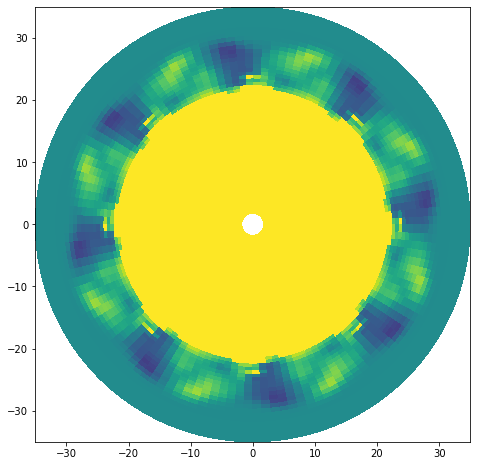

In [12]:
fig, ax = plt.subplots(1, 1, figsize=(8,8))

ax.pcolormesh(x_grid, y_grid, vals, vmin=-0.001, vmax=0.001)
ax.set_aspect('equal')

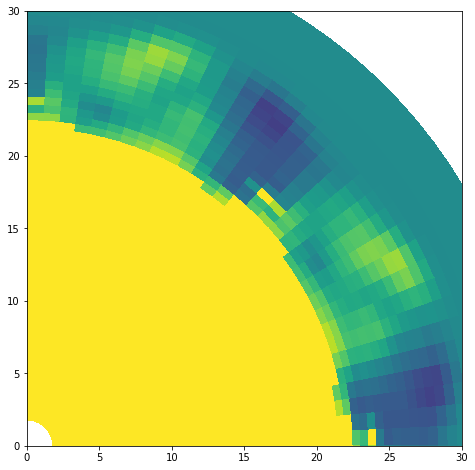

In [13]:
fig, ax = plt.subplots(1, 1, figsize=(8,8))

ax.pcolormesh(x_grid, y_grid, vals, vmin=-0.001, vmax=0.001)
ax.set_xlim((0,30))
ax.set_ylim((0,30))
ax.set_aspect('equal')

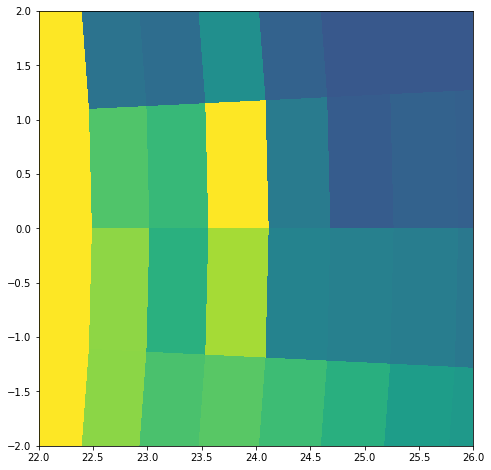

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(8,8))

ax.pcolormesh(x_grid, y_grid, vals, vmin=-0.001, vmax=0.001)
ax.set_xlim((22,26))
ax.set_ylim((-2, 2))
ax.set_aspect('equal')

In [15]:
data = athena_read.athdf(idf, quantities=[q],
                         level=1, 
                         fast_restrict=False,
                         subsample=False,
                         return_levels=True,
                         face_func_2=theta_func,
                         raw=True,
                        )
print(data.keys())

dict_keys(['Coordinates', 'DatasetNames', 'MaxLevel', 'MeshBlockSize', 'NumCycles', 'NumMeshBlocks', 'NumVariables', 'RootGridSize', 'RootGridX1', 'RootGridX2', 'RootGridX3', 'Time', 'VariableNames', 'Levels', 'LogicalLocations', 'x1f', 'x2f', 'x3f', 'x1v', 'x2v', 'x3v', 'rho', 'press', 'vel1', 'vel2', 'vel3', 'Bcc1', 'Bcc2', 'Bcc3'])


In [16]:
r     = data['x1v']
theta = data['x2v']
phi   = data['x3v']

In [17]:
irb, ir = np.where((22 < r) & (r < 26))
itb, it = np.where((np.pi/2-0.1 < theta) & (theta < np.pi/2+0.1))
ipb1, ip1 = np.where((phi < 0.1))
ipb2, ib2 = np.where((phi > 2*np.pi-0.1))
ipb = np.concatenate([ipb1, ipb2])

In [18]:
np.unique(ipb)

array([  0,   1,   2,   3,   4,   5,  10,  11,  12,  13,  36,  37,  38,
        39,  40,  41,  46,  47,  48,  49,  72,  73,  74,  75,  80,  81,
        82,  83,  88,  89, 108, 109, 110, 111, 116, 117, 118, 119, 124,
       125, 162, 163, 168, 169, 170, 171, 176, 177, 178, 179, 198, 199,
       204, 205, 206, 207, 212, 213, 214, 215, 238, 239, 240, 241, 246,
       247, 248, 249, 250, 251, 274, 275, 276, 277, 282, 283, 284, 285,
       286, 287], dtype=int64)

In [19]:
i = np.intersect1d(np.intersect1d(np.unique(irb), np.unique(itb)), np.unique(ipb))
print(i)
print(len(i))

[ 48  49 116 117 214 215 282 283]
8


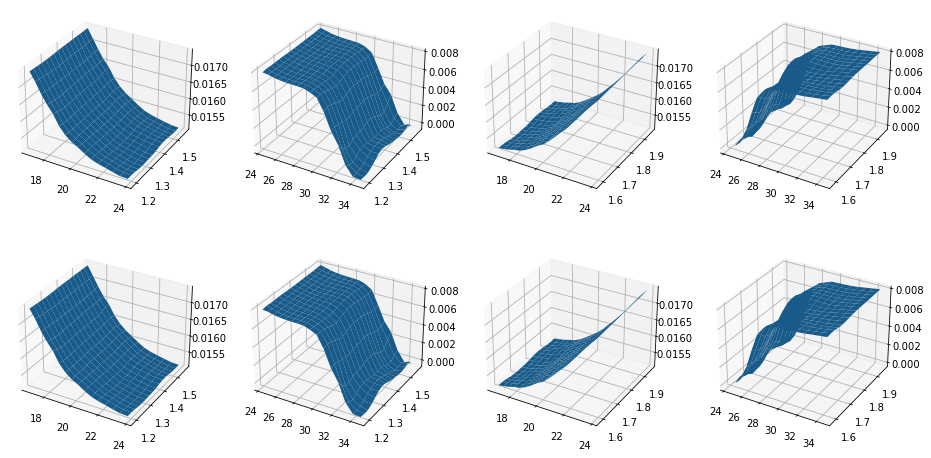

In [20]:
fig = plt.figure(figsize=(16,8))
for k, j in enumerate(i):
    ax = fig.add_subplot(2, 4, k+1, projection='3d')
    rg, tg = np.meshgrid(r[j,:], theta[j,:])
    ax.plot_surface(rg, tg, data[q][j,:,:,0])

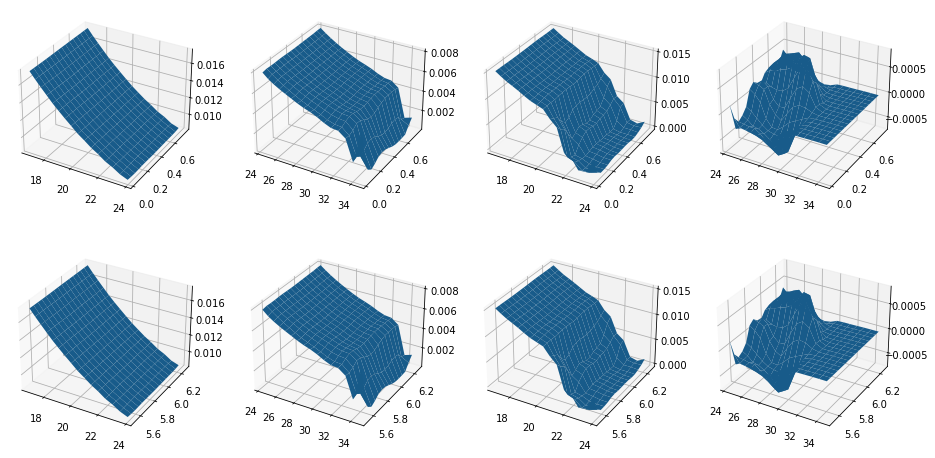

In [21]:
fig = plt.figure(figsize=(16,8))
for k, j in enumerate(i):
    ax = fig.add_subplot(2, 4, k+1, projection='3d')
    rg, pg = np.meshgrid(r[j,:], phi[j,:])
    ax.plot_surface(rg, pg, data[q][j,:,0,:])

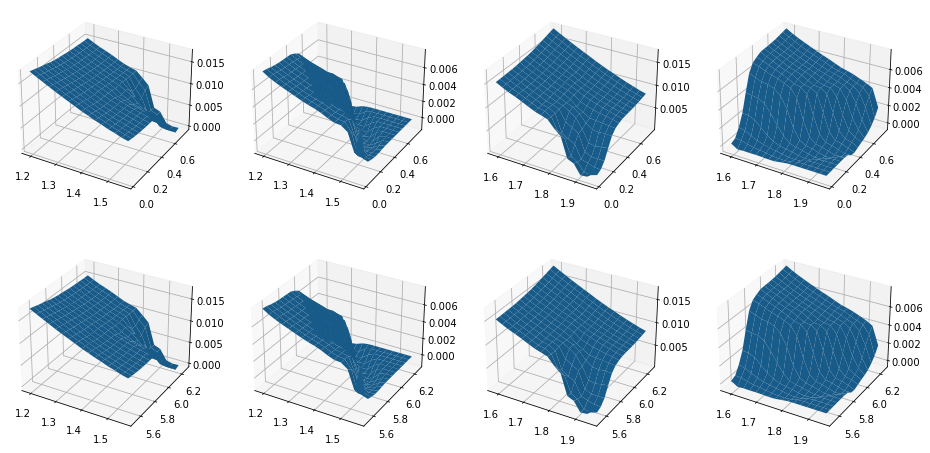

In [22]:
fig = plt.figure(figsize=(16,8))
for k, j in enumerate(i):
    ax = fig.add_subplot(2, 4, k+1, projection='3d')
    tg, pg = np.meshgrid(theta[j,:], phi[j,:])
    ax.plot_surface(tg, pg, data[q][j,0,:,:])